In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [46]:
from PIL import Image

## 1 K-means Clustering
### 1.1 Implementing K-means
- **1.1.1 Finding closest centroids**
- **1.1.2 Computing centroid means**

### 1.2 K-means on example dataset
### 1.3 Random initialization
### 1.4 Image compression with K-means
- **1.4.1 K-means on pixels**

In [47]:
def getData(filename):
    data = sio.loadmat(filename)
    return data

[Numpy计算各类距离 (np.linalg.norm)](https://blog.csdn.net/qq_19707521/article/details/78479532)

In [48]:
# Part 1: Find Closest Centroids
def findClosestCentroid(X, centroids):
    m = np.size(X, axis = 0)
    idx = np.zeros(m, dtype = np.int)
    K = np.size(centroids, axis = 0)
    for i in range(m):
        #c = np.argmin(np.sum((X[i, :] - centroids)**2, axis = 1))
        c = np.argmin(np.linalg.norm(X[i, :] - centroids, axis = 1)**2)
        idx[i] = np.int(c)
    return idx

In [49]:
# Part 2: Compute Centroid Means
def computeCentroids(X, K, idx):
    n = X.shape[1]
    centroids = np.zeros((K, n))
    for i in range(K):
        centroids[i] = np.mean(X[np.where(idx == i)], axis = 0) 
    return centroids

In [50]:
# Part 3: K-Means Clustering
def runKmeans(X, initial_centroids, max_iters):
    K = initial_centroids.shape[0]
    idx = findClosestCentroid(X, initial_centroids)
    for i in range(max_iters):
        centroids = computeCentroids(X, K, idx)
        idx = findClosestCentroid(X, centroids)
        '''
        plt.figure()
        plt.scatter(X[:,0], X[:,1], c = idx)
        for i in range(K):
            plt.plot(centroids[i, 0], centroids[i, 1], 'r+', markersize = 10)
        plt.show()'''
    return centroids, idx

In [51]:
#Random initialization
#先随机排列 X , 再取前 K 个examples作为initial_centroids
#而随机化 K 个 [0, m) 内的整数，作为索引选取K个initial_centroids，会有多次选择到同一个example的风险
def KmeansInitCentroids(X, K):
    randX = np.random.permutation(X) # 根据X的第1轴(axis = 0)产生一个新的乱序array,不改变原X [区别于np.randam.shaffle(X)]
    centroids = randX[:K, :]
    return centroids

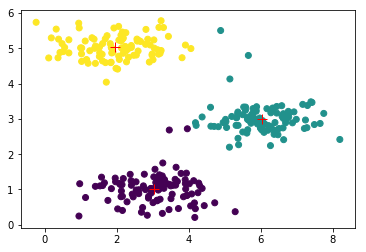

[[3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]]


In [52]:
#def main():
data = getData("ex7data2.mat")
X = data['X']
K = 3
iterations = 10
#initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
initial_centroids = KmeansInitCentroids(X, K)
centroids, idx = runKmeans(X, initial_centroids, iterations)

plt.figure()
plt.scatter(X[:,0], X[:,1], c = idx)
for i in range(K):
    plt.plot(centroids[i, 0], centroids[i, 1], 'r+', markersize = 10)
plt.show()

print(centroids)

(128, 128, 3) uint8 <class 'PIL.PngImagePlugin.PngImageFile'>


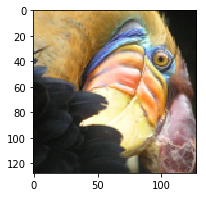

In [53]:
# Part 4: K-Means Clustering on Pixels

#A = sio.loadmat("bird_small.mat")["A"]   
#im = Image.fromarray(A).convert('L')
im = Image.open("bird_small.png")
A = np.array(im)
plt.figure(figsize = (3, 3))
plt.imshow(A)
#plt.imshow(A)
print(A.shape, A.dtype, type(im))

In [54]:
# Part 5: Image Compression
m = A.shape[0]*A.shape[1]
X = A.reshape(m, 3)
K = 16
max_iters = 10
initial_centroids = KmeansInitCentroids(X, K)
centroids, idx = runKmeans(X, initial_centroids, max_iters)

这使您可以使用每个像素的质心分配来表示原始图像。请注意, 您已显著减少了描述图像所需的位数。对于128x128 像素位置中的每一个位置, 原始图像都需要 24位, 结果总大小为 128x12x24 = 339, 216位。新的表示形式需要一些16种颜色的字典形式的开销存储, 每种颜色都需要 24位, 但图像本身只需要每个像素位置4位。因此, 使用的最终位数是 16x24 + 128x12x4 = 65 920位, 对应于压缩原始图像约6倍。

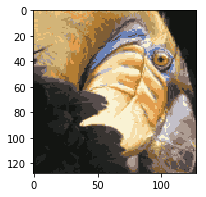

In [116]:
X_recovered = centroids[idx, :].reshape((128, 128 , 3))/255
plt.figure(figsize = (3, 3))
plt.imshow(X_recovered)

Image.fromarray(X) 函数中：
- 当 X 是三维(M, N, 3)数组时，表示是RGB图像，其元素的类型一定要转换为 uint8 , 即无符号8位整型
- 若 X 是二维(M, N)数组时，表示是灰度图像，范围是0-255，对其元素类型无要求

plt.imshow(X) 函数中， X 可以是数组，也是可以是 PIL Image实例。详情可 help(plt.imshow)

>X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4) 
Display the image in `X` to current axes.  `X` may be an array or a PIL image. If `X` is an array, it can have the following shapes and types:
- MxN -- values to be mapped (float or int)
- MxNx3 -- RGB (float or uint8)
- MxNx4 -- RGBA (float or uint8)

>MxN arrays are mapped to colors based on the `norm` (mapping scalar to scalar) and the `cmap` (mapping the normed scalar to a color).  
Elements of RGB and RGBA arrays represent pixels of an MxN image.
**All values should be in the range [0 .. 1] for floats or [0 .. 255] for integers.  Out-of-range values will be clipped to these  bounds.**

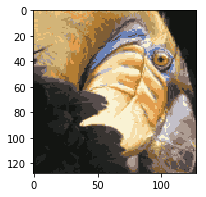

In [108]:
im_c = Image.fromarray((X_recovered*255).astype('uint8'))
plt.figure(figsize = (3, 3))
plt.imshow(im_c)

- np.ceil() 和 np.floor() 分别为向上取整和向下取整，不改变元素类型(dtype)
- X.astyep('int') 或 X.astype(np.int) 均为向下取整，改变元素类型为 int32

In [112]:
np.array([1.2, 1.8]).astype(np.int).dtype

dtype('int32')

In [ ]:
help(im1.convert)